## Cruzamento e análise de dados

Neste caderno faremos o cruzamento das seguintes fontes de dados:

1. API TransfereGov
2. Deputados
3. Senadores

Após cruzar os dados, faremos uma análise exploratória simples.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Carregar os dados

Vamos carregar os dados que foram salvos na pasta `dados` pelo caderno `1 Baixar os dados.ipynb`.

In [2]:
df_transferencias = pd.read_parquet("dados/transferencias-especiais.parquet")

In [3]:
df_deputados = pd.read_parquet("dados/deputados.parquet")

In [4]:
df_senadores = pd.read_parquet("dados/senadores.parquet")

### Escopo

Estamos trabalhando com os dados dos deputados e senadores que exercem o mandato no
momento atual.

Nos dados das emendas de 2024, podem haver emendas de parlamentares que não possuem mais
mandatos (ex.: licenciou-se para tomar posse como ministro ou candidatar-se a prefeito,
faleceu, reunciou, foi cassado, etc.). Esses não estão presentes nas consultas de dados
da Câmara e do Senado, por isso as suas emendas não aparecerão quando cruzarmos os dados
desta forma.

In [5]:
# parlamentares com emendas, mas nas situações acima descritas - não vão aparecer
(
    set(df_transferencias.nome.unique())
    - set(df_deputados.nome.unique())
    - set(df_senadores.nome.unique())
)

{'Afonso Florence',
 'Aj Albuquerque',
 'Amália Barros',
 'André Fernandes',
 'Beto Preto',
 'Carlos Fávaro',
 'Carlos Gomes',
 'Celso Sabino',
 'Coronel Telhada',
 'Dep. Josivaldo JP',
 'Dep. Roseana Sarney',
 'Dr. Allan Garcês',
 'Dr. Daniel Soranz',
 'Evair Vieira De Melo',
 'Fabio Garcia',
 'Geraldo Mendes',
 'Ivete da Silveira',
 'Júnior Mano',
 'Leandre',
 'Márcio Correa',
 'Paulo Marinho JR',
 'Prof. Paulo Fernando',
 'Ricardo Barros',
 'Rogério Marinho',
 'Rosangela Gomes',
 'Rosângela Moro',
 'Sandro Alex',
 'Silvio Antonio',
 'Sérgio Brito'}

### Cruzamento

In [6]:
# Merge com df_deputados
df_emendas = df_transferencias.merge(
    df_deputados,
    on='nome',
    how='left',
    suffixes=('', '_deputado')
)
df_emendas['cargo']=None
df_emendas.loc[df_emendas['partido'].notna(),['cargo']]='deputado'

# Merge com df_senadores
df_emendas = df_emendas.merge(
    df_senadores,
    on='nome',
    how='left',
    suffixes=('', '_senador')
)
#
df_emendas.loc[df_emendas['partido_senador'].notna(),['cargo']]='senador'

# Verifica se as colunas existem antes de usar fillna
if 'partido_senador' in df_emendas.columns:
    df_emendas['partido'] = df_emendas['partido'].fillna(df_emendas['partido_senador'])
if 'uf_senador' in df_emendas.columns:
    df_emendas['uf'] = df_emendas['uf'].fillna(df_emendas['uf_senador'])

# Remover colunas extras se existirem
df_emendas = df_emendas.drop(
    columns=[col for col in ['partido_senador', 'uf_senador', 'partido_deputado', 'uf_deputado'] if col in df_emendas.columns]
)

# Resultado final
df_emendas


,id_plano_acao,codigo_plano_acao,ano_plano_acao,modalidade_plano_acao,situacao_plano_acao,cnpj_beneficiario_plano_acao,nome_beneficiario_plano_acao,uf_beneficiario_plano_acao,codigo_banco_plano_acao,codigo_situacao_dado_bancario_plano_acao,...,id,uri,partido,uriPartido,siglaUf,idLegislatura,urlFoto,email,cargo,uf
0,69182,09032024-069182,2024,Especial,CIENTE,95990131000170,MUNICIPIO DE NOVA ITABERABA,SC,104,4.0,...,160604.0,https://dadosabertos.camara.leg.br/api/v2/depu...,PT,https://dadosabertos.camara.leg.br/api/v2/part...,SC,57.0,https://www.camara.leg.br/internet/deputado/ba...,dep.pedrouczai@camara.leg.br,deputado,NaN
1,64478,09032024-064478,2024,Especial,CIENTE,41522186000126,MUNICIPIO DE PASSAGEM FRANCA DO PIAUI,PI,001,4.0,...,NaN,NaN,PSD,NaN,NaN,NaN,NaN,NaN,senador,PI
2,64487,09032024-064487,2024,Especial,CIENTE,01612590000176,MUNICIPIO DE MILTON BRANDAO,PI,104,4.0,...,NaN,NaN,PSD,NaN,NaN,NaN,NaN,NaN,senador,PI
3,72493,09032024-072493,2024,Especial,CIENTE,18114264000131,MUNICIPIO DE ESPERA FELIZ,MG,104,4.0,...,178895.0,https://dadosabertos.camara.leg.br/api/v2/depu...,PSD,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57.0,https://www.camara.leg.br/internet/deputado/ba...,dep.misaelvarella@camara.leg.br,deputado,NaN
4,73453,09032024-073453,2024,Especial,CIENTE,18114264000131,MUNICIPIO DE ESPERA FELIZ,MG,104,4.0,...,204524.0,https://dadosabertos.camara.leg.br/api/v2/depu...,PP,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57.0,https://www.camara.leg.br/internet/deputado/ba...,dep.pinheirinho@camara.leg.br,deputado,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10929,74317,09032024-074317,2024,Especial,CIENTE,75368928000122,MUNICIPIO DE MAMBORE,PR,104,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
10930,69119,09032024-069119,2024,Especial,CIENTE,14196042000154,TEOLÂNDIA,BA,104,4.0,...,204571.0,https://dadosabertos.camara.leg.br/api/v2/depu...,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57.0,https://www.camara.leg.br/internet/deputado/ba...,dep.alexsantana@camara.leg.br,deputado,NaN
10931,73476,09032024-073476,2024,Especial,CIENTE,18094870000132,MUNICIPIO DE SENHORA DOS REMEDIOS,MG,001,4.0,...,204524.0,https://dadosabertos.camara.leg.br/api/v2/depu...,PP,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57.0,https://www.camara.leg.br/internet/deputado/ba...,dep.pinheirinho@camara.leg.br,deputado,NaN
10932,72488,09032024-072488,2024,Especial,CIENTE,46362927000172,MUNICIPIO DE BROTAS,SP,104,4.0,...,178985.0,https://dadosabertos.camara.leg.br/api/v2/depu...,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57.0,https://www.camara.leg.br/internet/deputado/ba...,dep.miguellombardi@camara.leg.br,deputado,NaN


### Análise exploratória

#### Quantidades de emendas

Quantas emendas há por deputados ou senadores?

In [7]:
df_emendas.cargo.value_counts()

cargo
deputado    8307
senador     1894
Name: count, dtype: int64

In [8]:
# na Câmara
df_emendas[df_emendas.cargo == "deputado"].partido.value_counts()

partido
PL               1620
PT               1068
PP                865
UNIÃO             859
PSD               785
MDB               710
REPUBLICANOS      640
PDT               366
PSDB              260
PODE              226
PSB               220
PRD               168
AVANTE            161
CIDADANIA         133
PCdoB              79
SOLIDARIEDADE      74
PV                 49
NOVO               15
REDE                7
PSOL                2
Name: count, dtype: int64

In [9]:
# no Senado
df_emendas[df_emendas.cargo == "senador"].partido.value_counts()

partido
PSD             347
MDB             317
PL              287
PP              272
UNIÃO           214
PODEMOS         136
REPUBLICANOS    126
PT               88
PSB              68
PSDB             20
PDT              19
Name: count, dtype: int64

#### Valores totais por parlamentar

In [10]:
df_emendas["valor_emenda"] = (
    df_emendas["valor_custeio_plano_acao"]
    + df_emendas["valor_investimento_plano_acao"]
)

In [11]:
colunas_agregacao = ['nome','partido']

##### Câmara

In [12]:
df_emendas_deputados = (
    df_emendas[df_emendas['cargo']=='deputado']
    .groupby(colunas_agregacao)
    .sum()
    ['valor_emenda']
    .sort_values(ascending=False)
    .head(15)
)
df_emendas_deputados


nome                      partido
Robério Monteiro          PDT        18935792.0
Duda Ramos                MDB        18935792.0
Emanuel Pinheiro Neto     MDB        18935792.0
Júnior Ferrari            PSD        18935792.0
José Nelto                UNIÃO      18935792.0
Idilvan Alencar           PDT        18935792.0
Filipe Barros             PL         18935792.0
Flávio Nogueira           PT         18935792.0
Fábio Macedo              PODE       18935792.0
Lêda Borges               PSDB       18935792.0
Marcos Aurélio Sampaio    PSD        18935792.0
Meire Serafim             UNIÃO      18935792.0
Luiz Fernando Faria       PSD        18935792.0
Lucio Mosquini            MDB        18935792.0
Pastor Sargento Isidório  AVANTE     18935792.0
Name: valor_emenda, dtype: float64

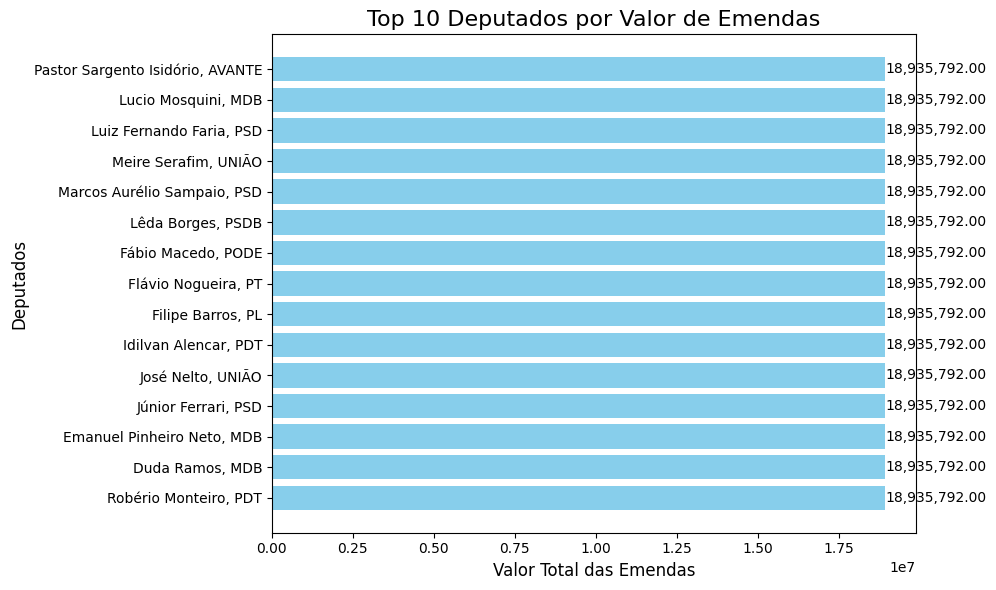

In [13]:
# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
# Convert the MultiIndex to a list of strings
y_labels = [', '.join(map(str, item)) for item in df_emendas_deputados.index]
plt.barh(y_labels,
         df_emendas_deputados.values,
         color='skyblue')

# Adicionando título e rótulos aos eixos
plt.title('Top 10 Deputados por Valor de Emendas', fontsize=16)
plt.xlabel('Valor Total das Emendas', fontsize=12)
plt.ylabel('Deputados', fontsize=12)

# Exibindo os valores nas barras
# Note: Using len(y_labels) ensures we iterate through the correct number of bars
for index, value in enumerate(df_emendas_deputados.values):
    plt.text(value, index, f'{value:,.2f}', va='center', fontsize=10)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

##### Senado

In [14]:
df_emendas_senadores = (
    df_emendas[df_emendas['cargo']=='senador']
    .groupby(colunas_agregacao)
    .sum()
    ['valor_emenda']
    .sort_values(ascending=False)
    .head(10)
)
df_emendas_senadores

nome             partido
Jayme Campos     UNIÃO      34817425.0
Marcos Rogério   PL         34817425.0
Jussara Lima     PSD        34817425.0
Davi Alcolumbre  UNIÃO      34815000.0
Otto Alencar     PSD        34634850.0
Ciro Nogueira    PP         34634850.0
Giordano         MDB        34500000.0
Fernando Farias  MDB        34317425.0
Eliziane Gama    PSD        34317425.0
Angelo Coronel   PSD        34134850.0
Name: valor_emenda, dtype: float64

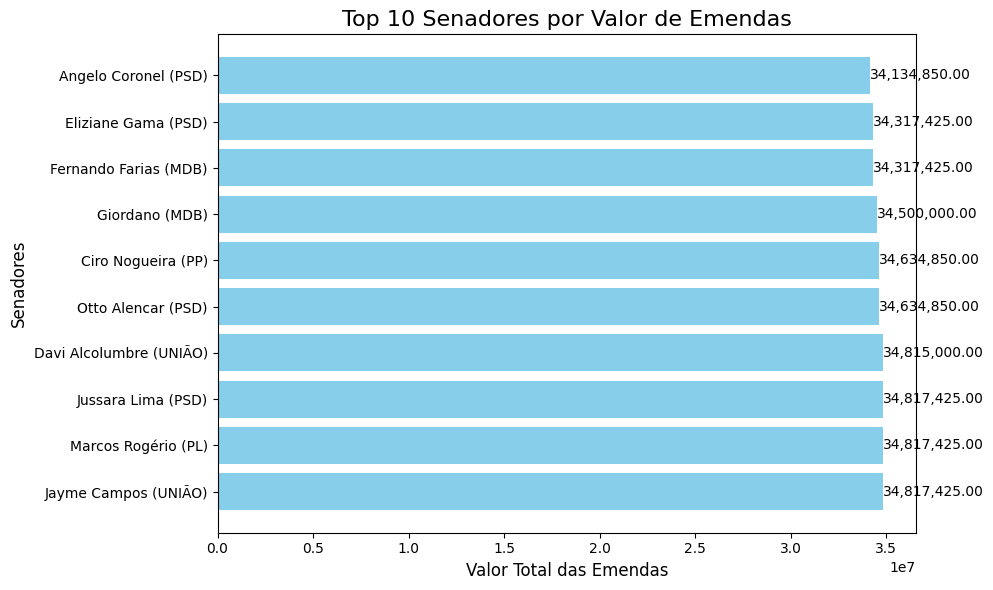

In [15]:
# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
# Converting the MultiIndex to string labels
y_labels = df_emendas_senadores.index.map(lambda x: f'{x[0]} ({x[1]})')
plt.barh(y_labels,
         df_emendas_senadores.values,
         color='skyblue')

# Adicionando título e rótulos aos eixos
plt.title('Top 10 Senadores por Valor de Emendas', fontsize=16)
plt.xlabel('Valor Total das Emendas', fontsize=12)
plt.ylabel('Senadores', fontsize=12)

# Exibindo os valores nas barras
for index, value in enumerate(df_emendas_senadores.values):
    plt.text(value, index, f'{value:,.2f}', va='center', fontsize=10)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()